<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/Geopandas/blob/main/Exploring_geopandas/Geopandas_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to GeoPandas

[GeoPandas](https://geopandas.org/) adds a `geometry` data-type to pandas to allow manipulation of feature data. The `geometry` objects in the rows of a `geopandas` dataframe are `shapely` objects (`Point`, `LineString` and `Polygon`, as well as Geometry collections). Currently `geopandas` is in the process of converting its interal geometric operations such that they make use of the [PyGEOS](https://pygeos.readthedocs.io/en/latest/) module, which allows for faster, vectorized operations on arrays of geometries. For now, the use of `PyGEOS` is still experimental and we will be using the `shapely` based version of `geopandas`.  

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 4.1 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 11.5 MB 39.9 MB/s 
     |████████████████████████████████| 6.6 MB 25.3 MB/s 
     |████████████████████████████████| 1.0 MB 33.3 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 510 kB 35.6 MB/s 
     |████████████████████████████████| 15.7 MB 76 kB/s 
     |████████████████████████████████| 247 kB 44.3 MB/s 


In [ ]:
import geopandas as gpd

reading in a dataframe

In [ ]:
df = gpd.read_file('/content/ne_10m_admin_0_countries.shp')

In [ ]:
df.columns

Index(['ne_10m_adm', 'ScaleRank', 'LabelRank', 'FeatureCla', 'OID_',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'NAME',
       'ABBREV', 'POSTAL', 'NAME_FORMA', 'TERR_', 'NAME_SORT', 'MAP_COLOR',
       'POP_EST', 'GDP_MD_EST', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'geometry'],
      dtype='object')

In [ ]:
df.shape

(253, 32)

In [ ]:
df.drop_duplicates(subset='ne_10m_adm').shape

(253, 32)

In [ ]:
df = df[['ne_10m_adm', 'ADMIN', 'geometry']].copy()
df.columns = ['iso', 'country', 'geometry']

In [ ]:
df

,iso,country,geometry
0,ABW,Aruba,"POLYGON ((-69.87609 12.42720, -69.88738 12.417..."
1,AFG,Afghanistan,"POLYGON ((71.02458 38.44192, 71.03296 38.42365..."
2,AGO,Angola,"MULTIPOLYGON (((11.74148 -16.72017, 11.78024 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.03690 18.21277, -63.09881 ..."
4,ALB,Albania,"POLYGON ((20.06496 42.54676, 20.08563 42.53001..."
...,...,...,...
248,WSM,Samoa,"MULTIPOLYGON (((-171.56901 -13.93822, -171.563..."
249,YEM,Yemen,"MULTIPOLYGON (((53.34148 12.11187, 53.32153 12..."
250,ZAF,South Africa,"MULTIPOLYGON (((37.86418 -46.94091, 37.83679 -..."
251,ZMB,Zambia,"POLYGON ((32.92086 -9.40790, 32.92303 -9.46629..."


- note the `geometry` column
- contains both `POLYGON` and `MULTIPOLYGON` entries
- these are `shapely` objects!

Since this is a `pandas` dataframe, we can select rows in all the ways we already know. For example

In [ ]:
df[df.iso=='CHE']

,iso,country,geometry
39,CHE,Switzerland,"POLYGON ((9.27321 47.65009, 9.54751 47.53452, ..."


We can convince ourselves that these are indeed `shapely` geometries

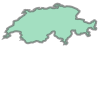

In [ ]:
df[df.iso=='CHE'].geometry.values[0]

In [ ]:
type(df[df.iso=='CHE'].geometry.values[0])

shapely.geometry.polygon.Polygon

`geopandas` makes use of [Matplotlib](https://matplotlib.org/), the main plotting library in python, to visualize dataframes. This is very simple

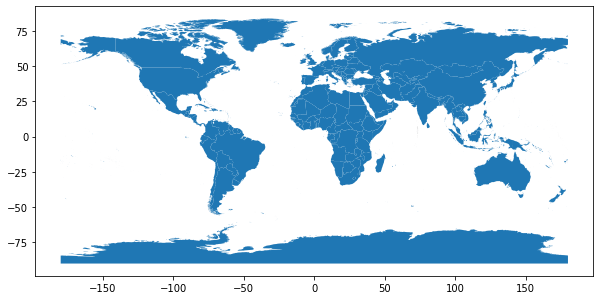

In [ ]:
df.plot(figsize=(10, 6))

Since we have shapely geometries, we can calculate their areas

In [ ]:
df[df.iso=='CHE'].geometry.values[0].area

4.88221521842493

In [ ]:
df[df.iso=='USA'].geometry.values[0].area

1116.115359419577

In [ ]:
df[df.iso=='CAN'].geometry.values[0].area

1690.3096069744136

In [ ]:
df[df.iso=='CHN'].geometry.values[0].area

950.8729542616412

something is off... 
It's the projection! We are in a geographic CRS. To do meaningful area calculations, we have to project the data.

In [ ]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We will cover map projections in the next section.

There is a lot you can do with geopandas. The best way to learn is to go over some examples that solve concrete problems. 